In [82]:
from selenium import webdriver
import requests
import time
import pandas as pd
import numpy as np
import csv
import json
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
dr = webdriver.Chrome('C:\\Users\\O1819\\.wdm\\drivers\\chromedriver\\win32\\100.0.4896.60\\chromedriver.exe')
dr.get('https://www.youtube.com/watch?v=uOQAqowZ_kg&ab_channel=NBCNews')

In [97]:
data=[]

wait = WebDriverWait(dr,15)

for item in range(200): 
    
        wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        time.sleep(15)
        
for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
            data.append(comment.text)

In [98]:
import pandas as pd   
df = pd.DataFrame(data, columns=['comment'])
df.head()

,comment
0,SKIP NAVIGATION\nSIGN IN\n0:02 / 1:00\n#Russia...
1,Ukraine says six missiles struck the city of O...
2,Putting our time and affort in activities and ...
3,"They weren't missiles. They were ""special mil..."
4,


In [99]:
import re

In [100]:
#Data Cleaning
def cleanComment(com):

    com = re.sub('#[A-Za-z0-9]+', '', com)
    com = re.sub('\\n', '', com)
    com = re.sub('https?:\/\/\S+', '', com)
    com = re.sub('@[\S]*', '', com)
    com = re.sub('^[\s]+|[\s]+$', '', com)
    return com

In [101]:
#Cleaned Comments
df['Clean Comments'] = df['comment'].apply(cleanComment)

df.head()

,comment,Clean Comments
0,SKIP NAVIGATION\nSIGN IN\n0:02 / 1:00\n#Russia...,SKIP NAVIGATIONSIGN IN0:02 / 1:00 Russian Mis...
1,Ukraine says six missiles struck the city of O...,Ukraine says six missiles struck the city of O...
2,Putting our time and affort in activities and ...,Putting our time and affort in activities and ...
3,"They weren't missiles. They were ""special mil...","They weren't missiles. They were ""special mil..."
4,,


In [102]:
#Remove duplicate comments
df.drop_duplicates(inplace = True)
idx = list(range(0, len(df)))
df = df.set_index(pd.Index(idx))

df

,comment,Clean Comments
0,SKIP NAVIGATION\nSIGN IN\n0:02 / 1:00\n#Russia...,SKIP NAVIGATIONSIGN IN0:02 / 1:00 Russian Mis...
1,Ukraine says six missiles struck the city of O...,Ukraine says six missiles struck the city of O...
2,Putting our time and affort in activities and ...,Putting our time and affort in activities and ...
3,"They weren't missiles. They were ""special mil...","They weren't missiles. They were ""special mil..."
4,,
5,"..Well ,,there ...it is ...just in time for Mo...","..Well ,,there ...it is ...just in time for Mo..."
6,Shout out to George Floyd on 713 days of sobri...,Shout out to George Floyd on 713 days of sobri...
7,"Sorry for talking about unrelated stuff, but r...","Sorry for talking about unrelated stuff, but r..."
8,God Bless everyone ️️️,God Bless everyone ️️️
9,What is happening in Palestine in Jerusalem th...,What is happening in Palestine in Jerusalem th...


In [103]:
# Get the subjectivity
def  getSubjectivity(com):
    return TextBlob(com).sentiment.subjectivity
#Get the polarity
def getPolarity(com):
    return TextBlob(com).sentiment.polarity


In [104]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [105]:
df['Subjectivity'] = df['Clean Comments'].apply(getSubjectivity)
df['Polarity'] = df['Clean Comments'].apply(getPolarity)
df.head()

,comment,Clean Comments,Subjectivity,Polarity
0,SKIP NAVIGATION\nSIGN IN\n0:02 / 1:00\n#Russia...,SKIP NAVIGATIONSIGN IN0:02 / 1:00 Russian Mis...,0.404201,0.041101
1,Ukraine says six missiles struck the city of O...,Ukraine says six missiles struck the city of O...,0.227778,-0.055556
2,Putting our time and affort in activities and ...,Putting our time and affort in activities and ...,0.125000,0.000000
3,"They weren't missiles. They were ""special mil...","They weren't missiles. They were ""special mil...",0.335714,0.128571
4,,,0.000000,0.000000


In [106]:
#Classify as nagative or positive
def getSentiment(value):
    if value < 0:
        return 'Negative'
    elif value > 0:
        return 'Positive'
    else:
        return 'Neutral'

In [107]:
#Sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)
df.head()

,comment,Clean Comments,Subjectivity,Polarity,Sentiment
0,SKIP NAVIGATION\nSIGN IN\n0:02 / 1:00\n#Russia...,SKIP NAVIGATIONSIGN IN0:02 / 1:00 Russian Mis...,0.404201,0.041101,Positive
1,Ukraine says six missiles struck the city of O...,Ukraine says six missiles struck the city of O...,0.227778,-0.055556,Negative
2,Putting our time and affort in activities and ...,Putting our time and affort in activities and ...,0.125000,0.000000,Neutral
3,"They weren't missiles. They were ""special mil...","They weren't missiles. They were ""special mil...",0.335714,0.128571,Positive
4,,,0.000000,0.000000,Neutral


In [108]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

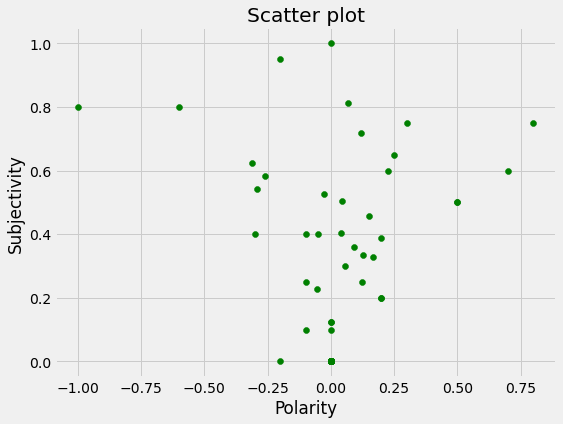

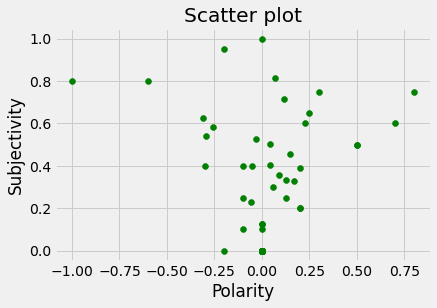

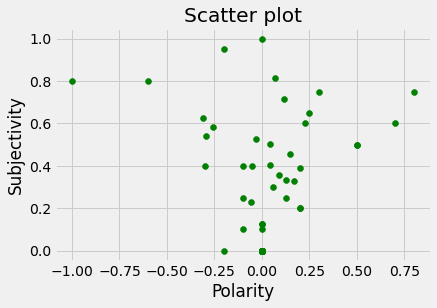

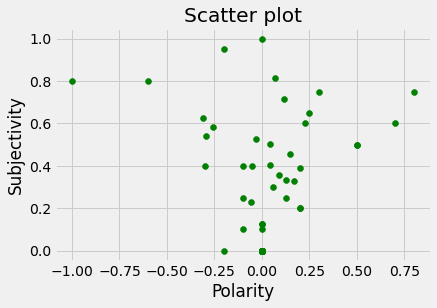

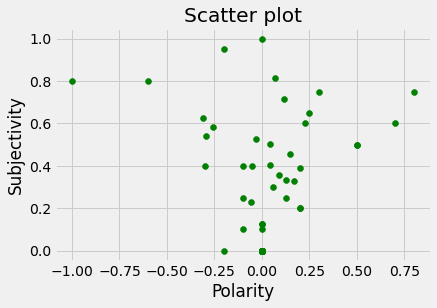

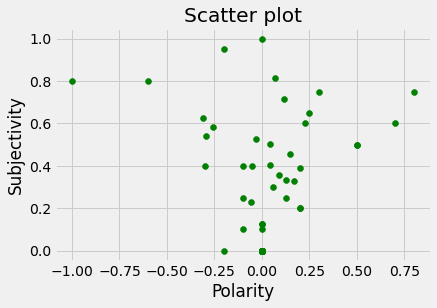

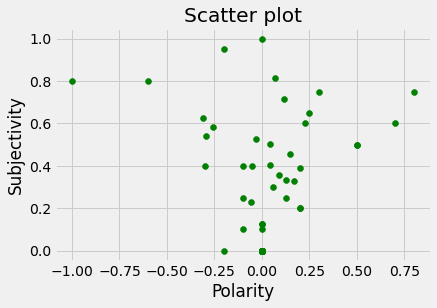

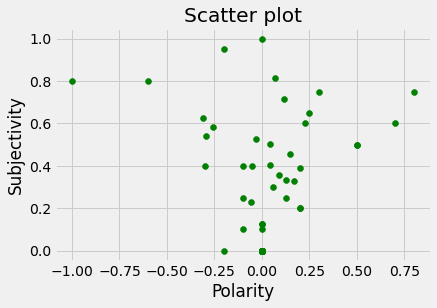

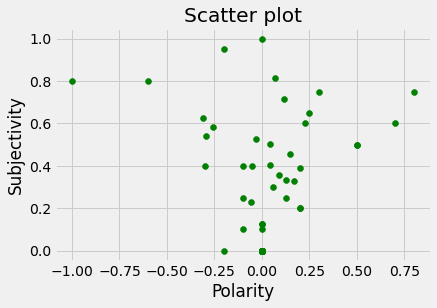

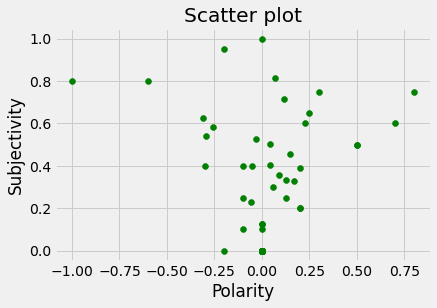

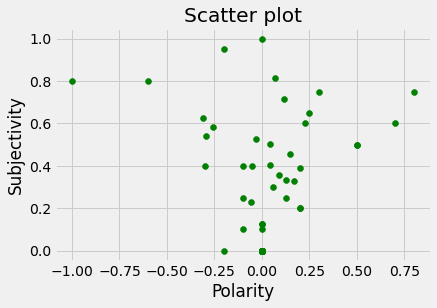

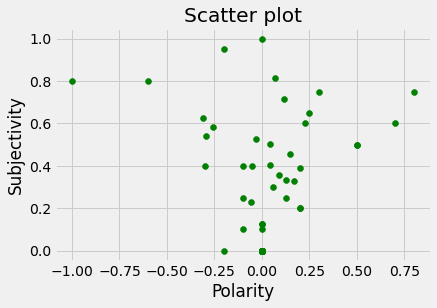

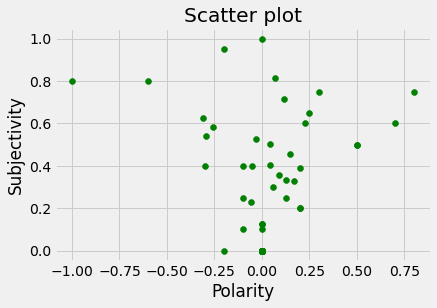

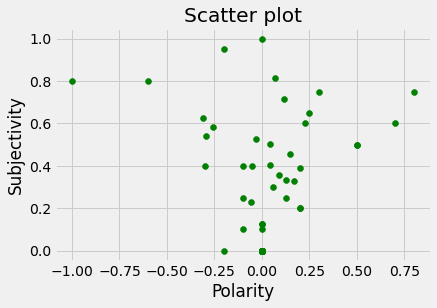

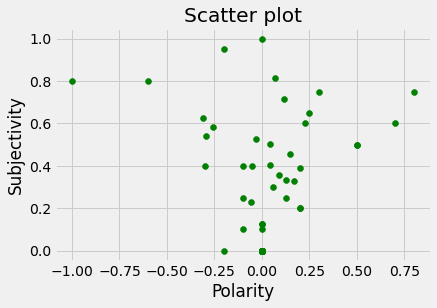

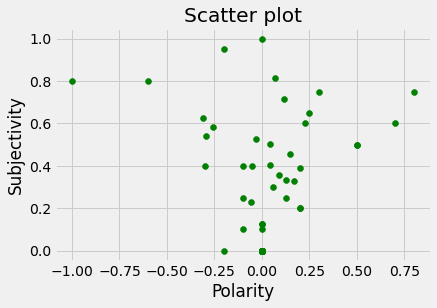

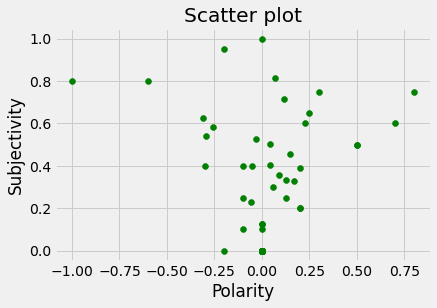

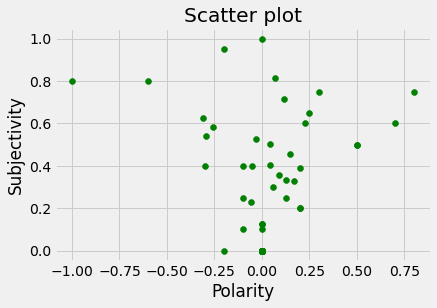

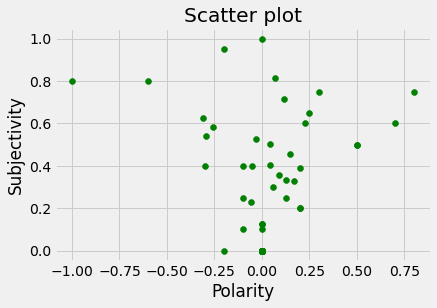

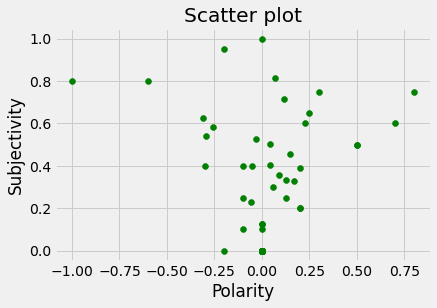

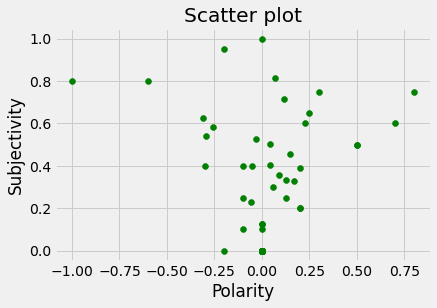

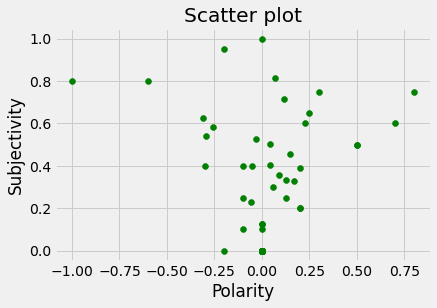

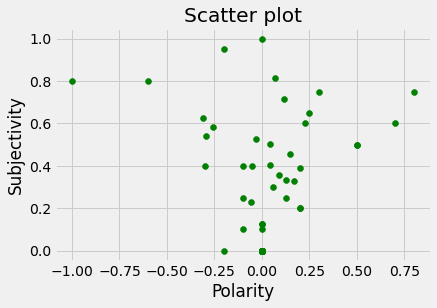

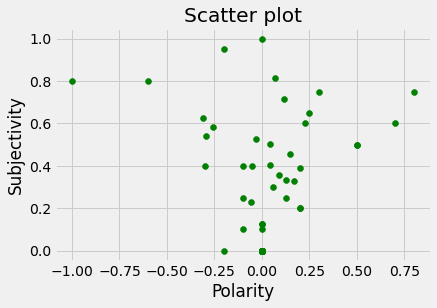

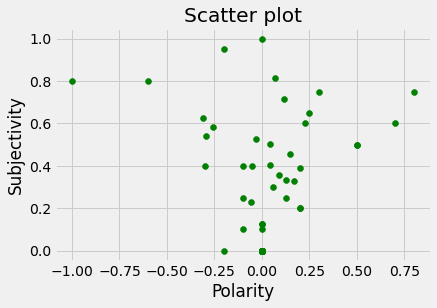

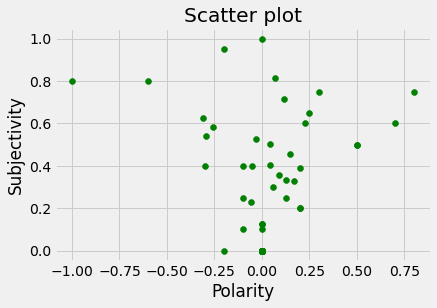

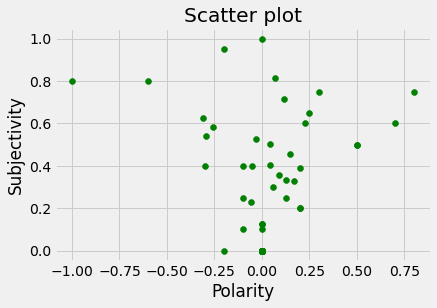

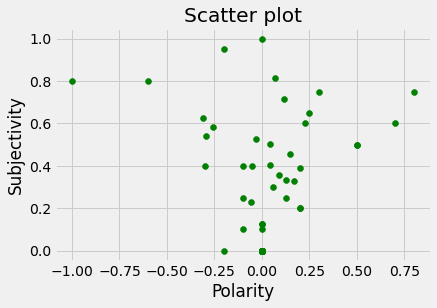

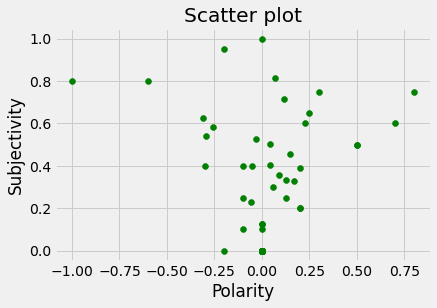

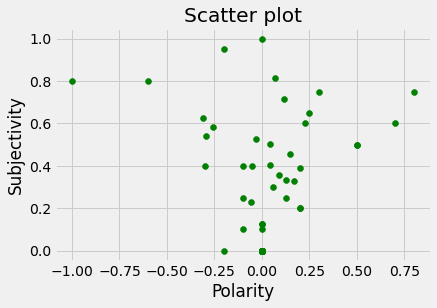

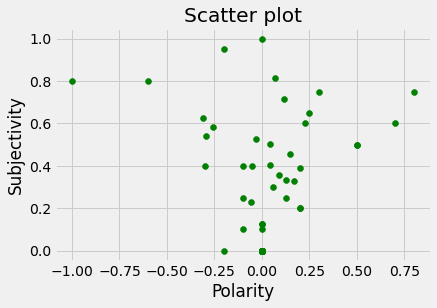

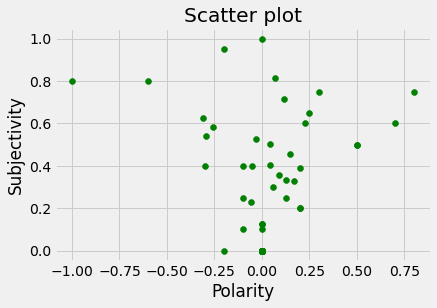

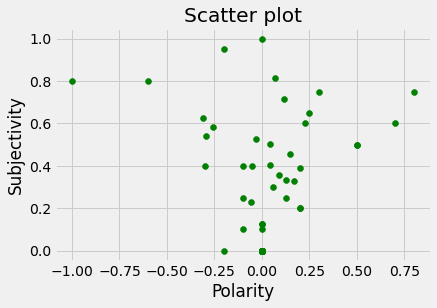

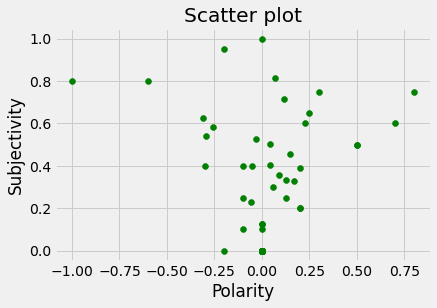

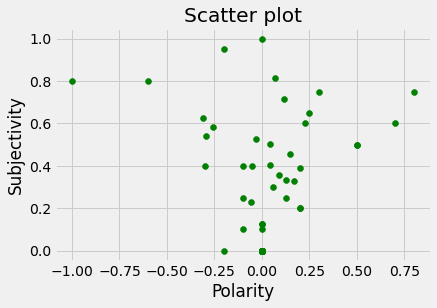

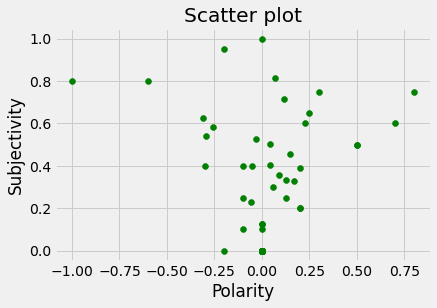

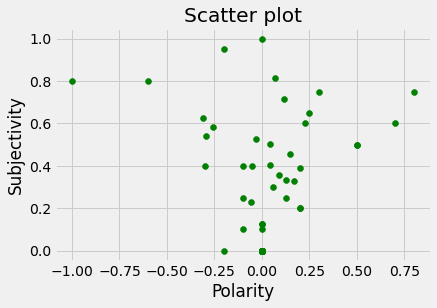

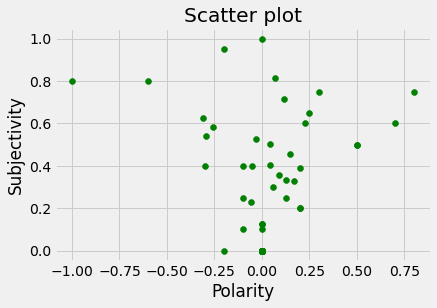

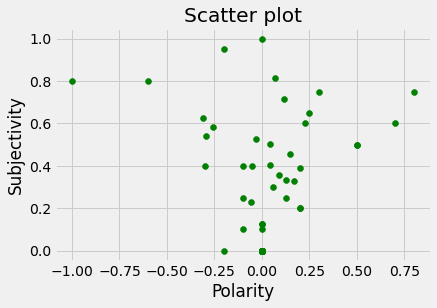

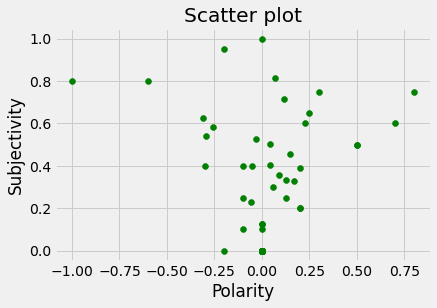

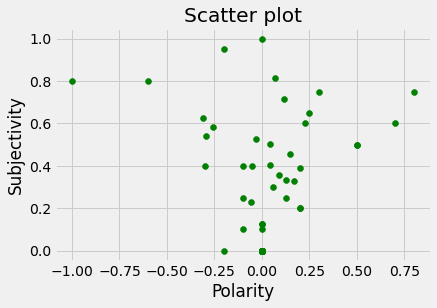

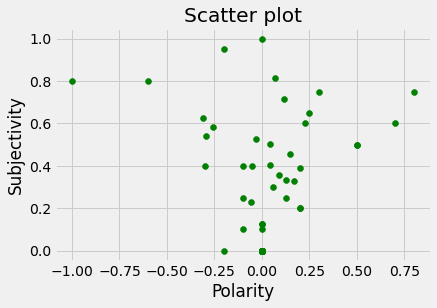

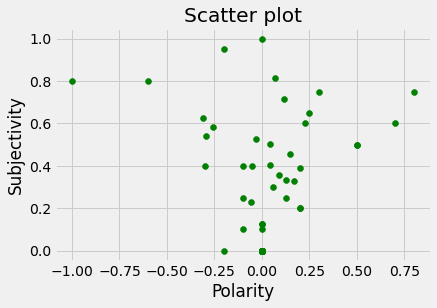

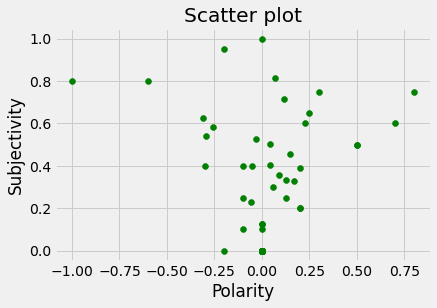

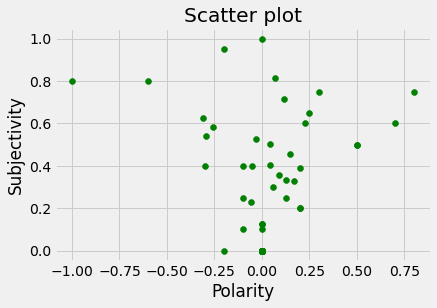

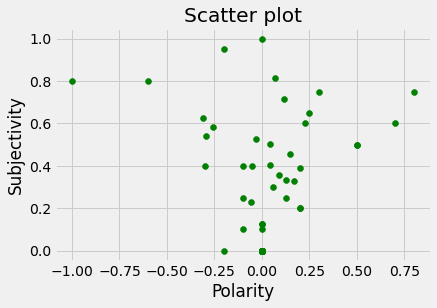

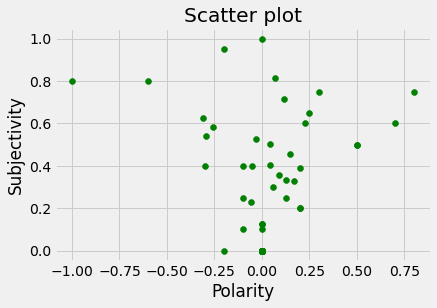

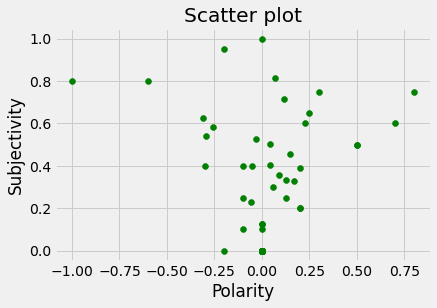

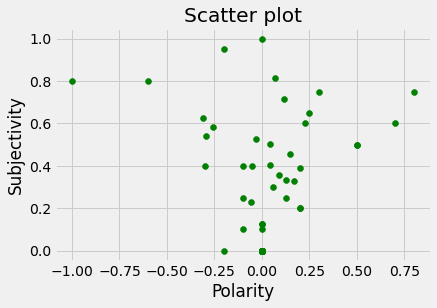

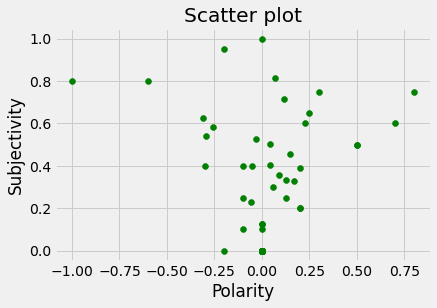

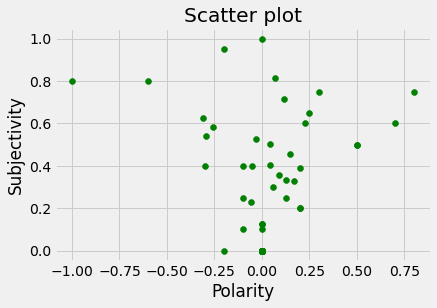

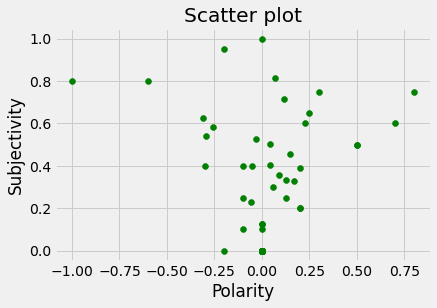

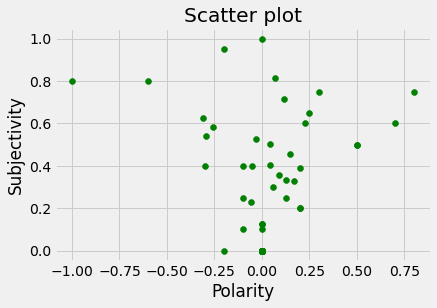

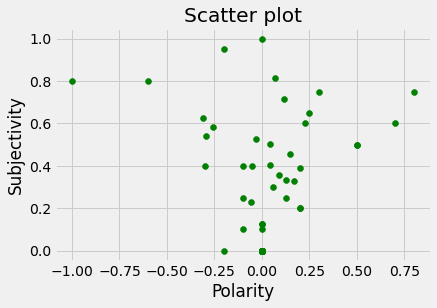

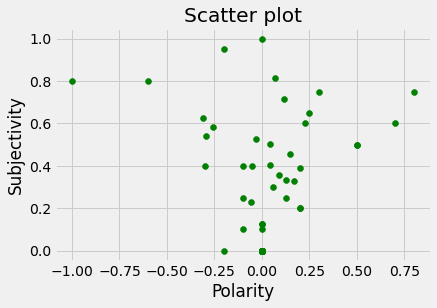

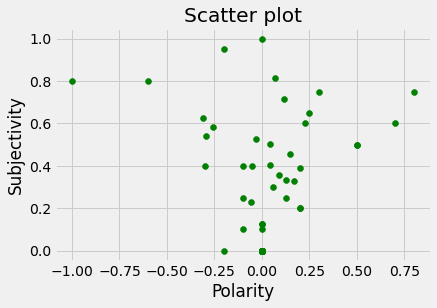

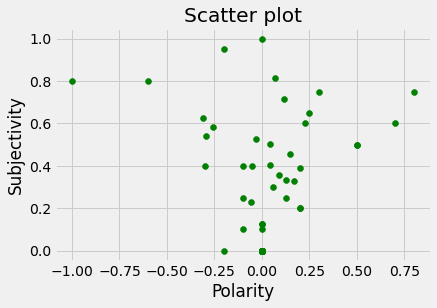

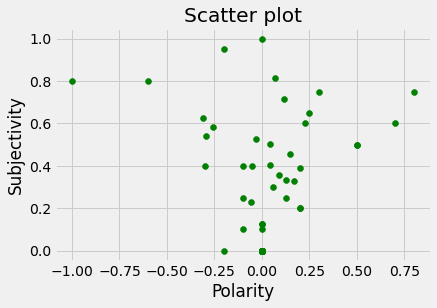

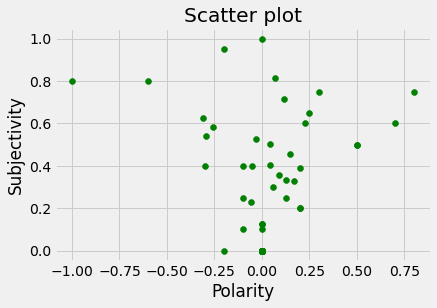

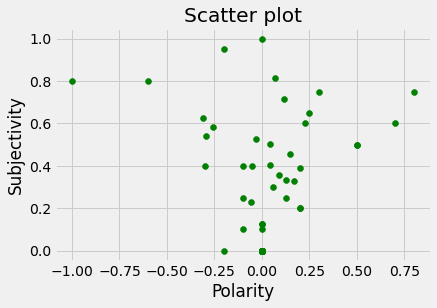

In [109]:
#Create a scatter plot
plt.figure(figsize = (8,6))
for i in range(0, len(df)):
    plt.scatter(df['Polarity'], df['Subjectivity'], color = 'green')
    plt.title('Scatter plot')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    
    plt.show();

Text(0, 0.5, 'Number of comments')

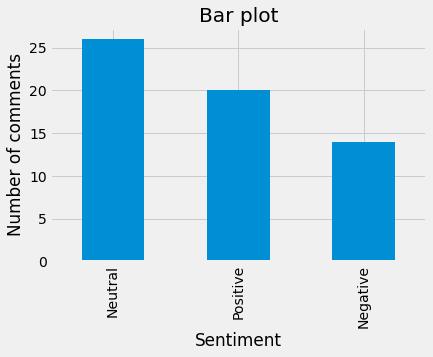

In [110]:
#Create bar chart
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Bar plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of comments')